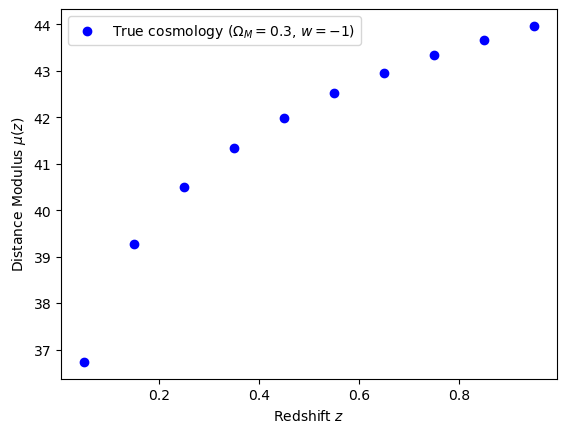

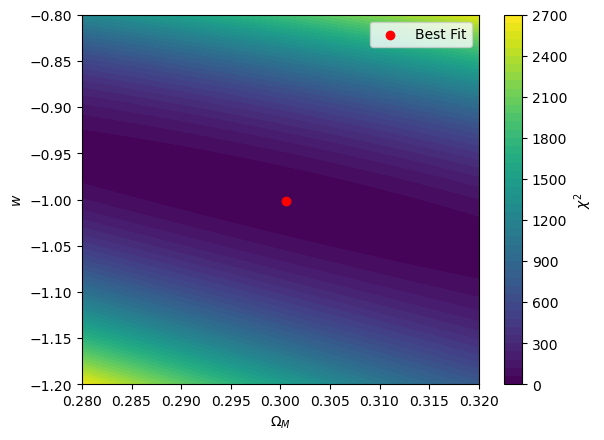

Best-fit w = -1.002, Omega_M = 0.301


In [1]:
import numpy as np
from astropy.cosmology import FlatwCDM
import matplotlib.pyplot as plt

# Step 1: Redshift Bins
z_vals = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

# Uncertainty for the distance modulus
sigma_mu = 0.005

# Gaussian prior Parameters for Omega_M
prior_OmegaM = 0.3
sigma_prior = 0.005

# Step 2: Generate mock data using true cosmology (i.e. mu_z)
cosmo_true = FlatwCDM(H0=70, Om0=0.3, w0=-1.0)
mu_data = cosmo_true.distmod(z_vals).value

# Plot the mock Hubble diagram
plt.scatter(z_vals, mu_data, label='True cosmology ($\Omega_M=0.3$, $w=-1$)', color='blue')
plt.xlabel('Redshift $z$')
plt.ylabel('Distance Modulus $\mu(z)$')
plt.legend()
plt.show()

# Step 3: Set up grid and populate itwith zeroes
w_grid = np.linspace(-1.2, -0.8, 100)
Om_grid = np.linspace(0.28, 0.32, 100)
chi2_grid = np.zeros((len(w_grid), len(Om_grid)))



# Step 4: Grid search
# For each combination of trial parameters (w, Omega_M), construct a FlatwCDM model
# and compute its predicted distance moduli at the redshift bins.  
# Then calculate the chi-squared from the data residuals and add the omega_M prior term.  
# Store the total chi-squared value in a 2D grid indexed by (i, j) corresponding to w_grid[i] and Om_grid[j].  
# This grid can be used to find the best-fit parameters and visualize the likelihood surface.
for i, w in enumerate(w_grid):
    for j, Om in enumerate(Om_grid):
        model = FlatwCDM(H0=70, Om0=Om, w0=w)
        mu_model = model.distmod(z_vals).value
        chi2_data = np.sum((mu_data - mu_model)**2 / sigma_mu**2)
        chi2_prior = ((Om - prior_OmegaM)**2) / sigma_prior**2
        chi2_grid[i, j] = chi2_data + chi2_prior

# Step 6: Plot the chi-squared surface
contour = plt.contourf(Om_grid, w_grid, chi2_grid, levels=50, cmap='viridis')
plt.colorbar(contour, label=r'$\chi^2$')


# Step 5: Find best-fit parameters
min_idx = np.unravel_index(np.argmin(chi2_grid), chi2_grid.shape)
best_w = w_grid[min_idx[0]]
best_Om = Om_grid[min_idx[1]]

plt.scatter(best_Om, best_w, color='red', label='Best Fit', zorder=5)
plt.xlabel(r'$\Omega_M$')
plt.ylabel(r'$w$')
plt.legend()
plt.show()

print(f"Best-fit w = {best_w:.3f}, Omega_M = {best_Om:.3f}")

### Part (b): Sensitivity of Best-Fit $w$ to Systematic $\mu$-Bias

In this section, we investigate how a small systematic bias in the supernova distance modulus $\mu(z)$ affects the inferred dark energy equation of state parameter $w$.

We apply a redshift-dependent bias of:

$$
\Delta \mu_{\text{bias}} = +0.01 \quad \text{for } z > z_{\min}
$$

and test values of $z_{\min} = 0.1, 0.2, \ldots, 0.9$. This mimics a calibration error or selection effect that skews the observed SN brightnesses at higher redshifts.

The biased data vector is defined as:

$$
\mu_{\text{biased}}(z) =
\begin{cases}
\mu_{\text{true}}(z), & \text{if } z \leq z_{\min} \\
\mu_{\text{true}}(z) + 0.01, & \text{if } z > z_{\min}
\end{cases}
$$

For each $z_{\min}$, we perform a grid search over $(w, \Omega_M)$ using the following chi-squared function:

$$
\chi^2(w, \Omega_M) = \sum_{i=1}^{N} \frac{[\mu_{\text{biased}}(z_i) - \mu_{\text{model}}(z_i; w, \Omega_M)]^2}{\sigma_\mu^2} + \frac{(\Omega_M - 0.3)^2}{(0.005)^2}
$$

The best-fit $w$ is recorded for each biased dataset, and we define the **$w$-bias** as:

$$
\Delta w_{\text{bias}} = w_{\text{fit}} - w_{\text{true}} = w_{\text{fit}} + 1
$$

since the fiducial model uses $w_{\text{true}} = -1.0$.

The maximum $w$-bias is expected to occur around $z_{\min} = 0.3$, with:

$$
\Delta w_{\text{bias}}^{\text{max}} \approx 0.036
$$

This analysis shows how sensitive cosmological parameter inference is to small systematic shifts in SN brightness — and emphasizes the need for precision calibration at all redshifts.

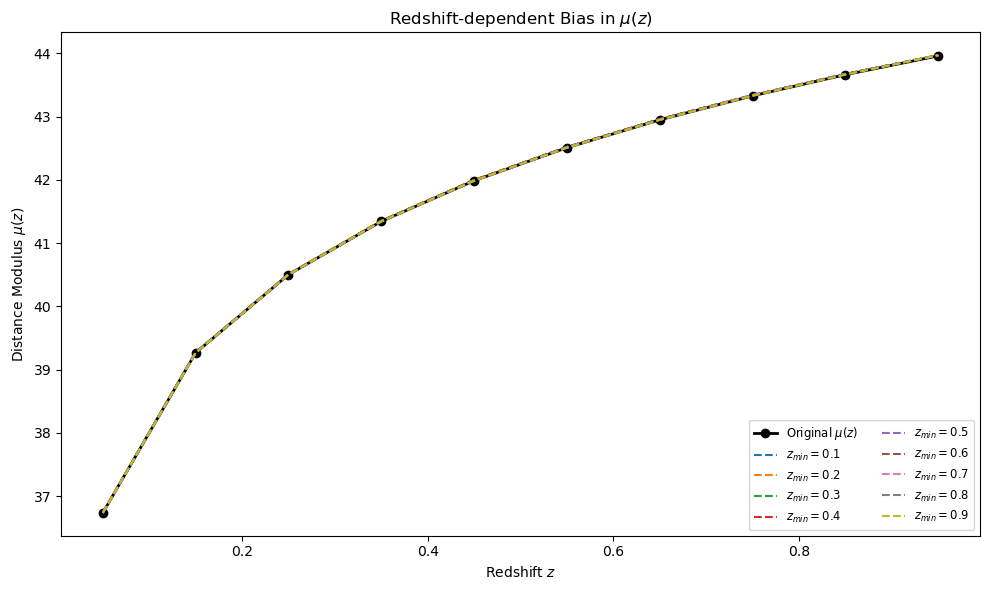

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatwCDM

# Define redshift values
z_vals = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

# True cosmology
cosmo_true = FlatwCDM(H0=70, Om0=0.3, w0=-1.0)
mu_data = cosmo_true.distmod(z_vals).value

# Redshift thresholds
zmin_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Plot original and biased mu(z)
plt.figure(figsize=(10, 6))
plt.plot(z_vals, mu_data, 'ko-', label='Original $\mu(z)$', linewidth=2)

for zmin in zmin_vals:
    biased_mu = mu_data.copy()
    biased_mu[z_vals > zmin] += 0.01
    plt.plot(z_vals, biased_mu, '--', label=f'$z_{{min}} = {zmin:.1f}$')

plt.xlabel('Redshift $z$')
plt.ylabel('Distance Modulus $\mu(z)$')
plt.title('Redshift-dependent Bias in $\mu(z)$')
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

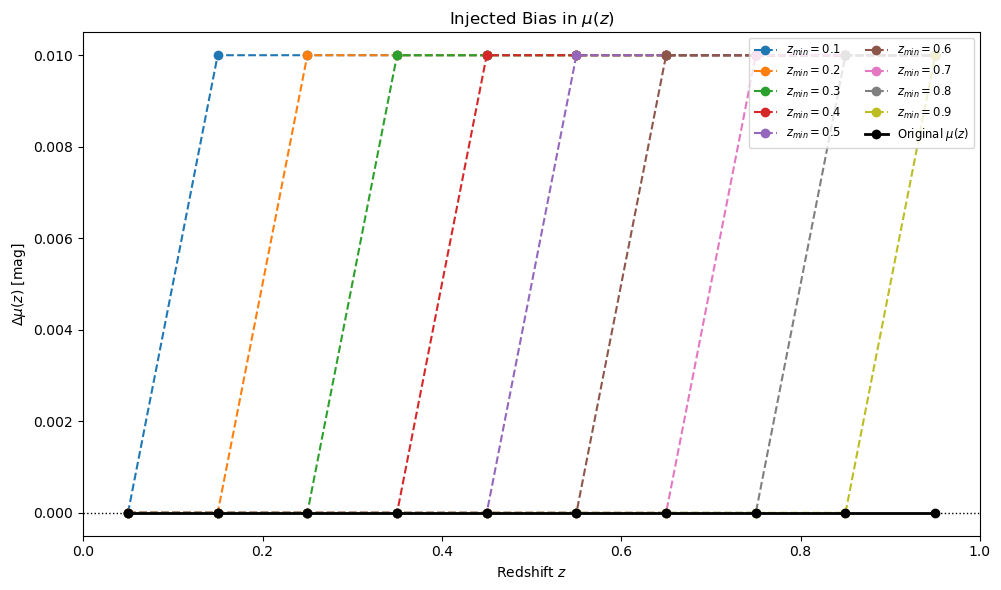

In [14]:
plt.figure(figsize=(10, 6))
for zmin in zmin_vals:
    biased_mu = mu_data.copy()
    biased_mu[z_vals > zmin] += 0.01
    delta_mu = biased_mu - mu_data
    plt.plot(z_vals, delta_mu, 'o--', label=f'$z_{{min}} = {zmin:.1f}$')

plt.plot(z_vals, mu_data - mu_data, 'ko-', label='Original $\mu(z)$', linewidth=2)
plt.axhline(0, color='black', linewidth=1, linestyle=':')
plt.xlabel('Redshift $z$')
plt.ylabel(r'$\Delta \mu(z)$ [mag]')
plt.title('Injected Bias in $\mu(z)$')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.tight_layout()
plt.xlim(0, 1)
plt.show()

In [3]:
zmin_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
wbias_list = [] # each entry will be tuple: (zmin, best_w, wbias)

# Loops over zmin threshold values.
for zmin in zmin_vals:
    
    biased_mu = mu_data.copy() # original mu_data - based on model
    biased_mu[z_vals > zmin] = biased_mu[z_vals > zmin] + 0.01

    # Reset chi2_grid for each zmin
    chi2_grid = np.zeros((len(w_grid), len(Om_grid)))

    # Step 2: Redo grid search for this biased dataset
    for i, w in enumerate(w_grid):
        for j, Om in enumerate(Om_grid):
            model = FlatwCDM(H0=70, Om0=Om, w0=w)
            mu_model = model.distmod(z_vals).value
            chi2_data = np.sum((biased_mu - mu_model)**2 / sigma_mu**2)
            chi2_prior = ((Om - prior_OmegaM)**2) / sigma_prior**2
            chi2_grid[i, j] = chi2_data + chi2_prior

    # Step 3: Find best-fit w
    min_idx = np.unravel_index(np.argmin(chi2_grid), chi2_grid.shape)
    best_w = w_grid[min_idx[0]]
    wbias = best_w + 1.0  # Because true w = -1
    wbias_list.append((zmin, best_w, wbias))

# Step 4: Report results
for zmin, best_w, wbias in wbias_list:
    print(f"zmin = {zmin:.1f} → best-fit w = {best_w:.3f} (Δw = {wbias:.3f})")

# Step 5: Optional — identify the maximum w-bias
max_wbias = max(wbias_list, key=lambda x: abs(x[2]))
print(f"\nMax Δw = {max_wbias[2]:.3f} occurs at zmin = {max_wbias[0]:.1f}")

zmin = 0.1 → best-fit w = -1.034 (Δw = -0.034)
zmin = 0.2 → best-fit w = -1.030 (Δw = -0.030)
zmin = 0.3 → best-fit w = -1.022 (Δw = -0.022)
zmin = 0.4 → best-fit w = -1.018 (Δw = -0.018)
zmin = 0.5 → best-fit w = -1.010 (Δw = -0.010)
zmin = 0.6 → best-fit w = -1.006 (Δw = -0.006)
zmin = 0.7 → best-fit w = -1.002 (Δw = -0.002)
zmin = 0.8 → best-fit w = -1.002 (Δw = -0.002)
zmin = 0.9 → best-fit w = -0.998 (Δw = 0.002)

Max Δw = -0.034 occurs at zmin = 0.1


zmin = 0.1, min Chi_2 at w = -1.0666666666666667, Omega_M = 0.314572864321608
Min chi-squared: 17.12
w bias: -0.067
zmin = 0.2, min Chi_2 at w = -1.0464646464646465, Omega_M = 0.3075376884422111
Min chi-squared: 17.54
w bias: -0.046
zmin = 0.3, min Chi_2 at w = -1.018181818181818, Omega_M = 0.2969849246231156
Min chi-squared: 18.40
w bias: -0.018
zmin = 0.4, min Chi_2 at w = -0.9898989898989898, Omega_M = 0.2864321608040201
Min chi-squared: 18.67
w bias: 0.010
zmin = 0.5, min Chi_2 at w = -0.9616161616161616, Omega_M = 0.27587939698492464
Min chi-squared: 18.31
w bias: 0.038
zmin = 0.6, min Chi_2 at w = -0.9494949494949495, Omega_M = 0.2723618090452261
Min chi-squared: 17.92
w bias: 0.051
zmin = 0.7, min Chi_2 at w = -0.9454545454545455, Omega_M = 0.2723618090452261
Min chi-squared: 17.98
w bias: 0.055
zmin = 0.8, min Chi_2 at w = -0.9494949494949495, Omega_M = 0.27587939698492464
Min chi-squared: 18.36
w bias: 0.051
zmin = 0.9, min Chi_2 at w = -0.9696969696969697, Omega_M = 0.2864321

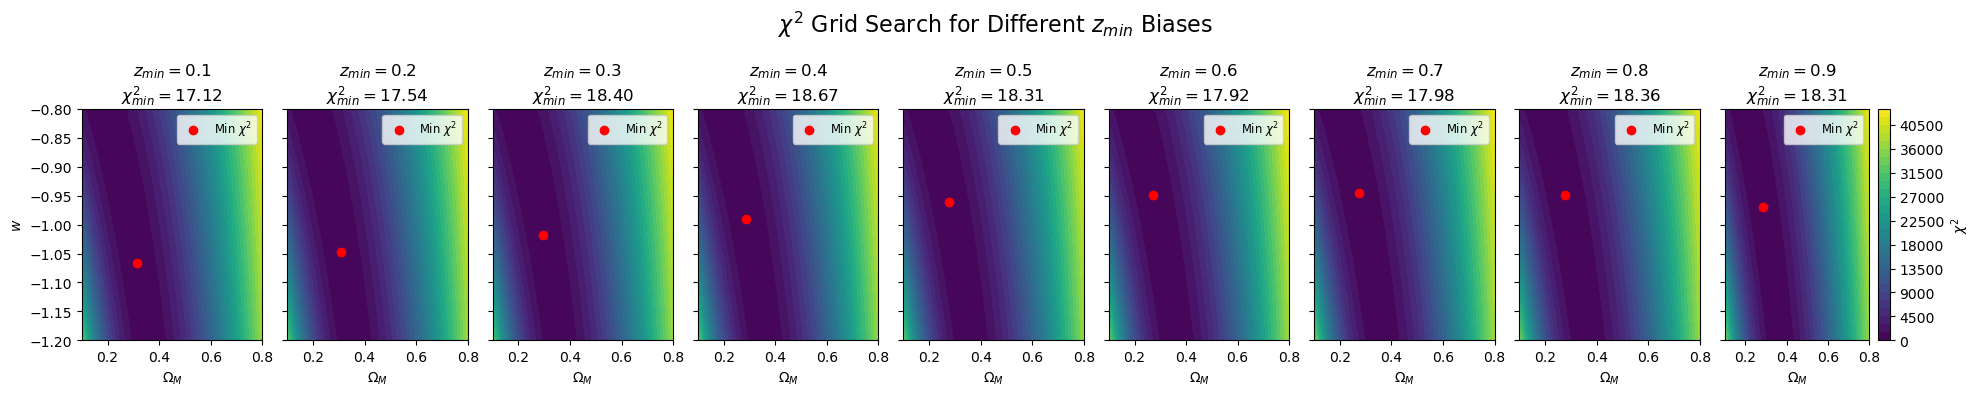

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatwCDM

# Define redshift and true cosmology
z_vals = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
wbias_list = [] # each entry will be tuple: (zmin, best_w, wbias)

cosmo_true = FlatwCDM(H0=70, Om0=0.3, w0=-1.0)
mu_data = cosmo_true.distmod(z_vals).value

# Parameters
w_grid = np.linspace(-1.2, -0.8, 100)
Om_grid = np.linspace(0.1, 0.8, 200)
sigma_mu = 0.005
prior_OmegaM = 0.3
sigma_prior = 0.005
zmin_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Set up plots
fig, axes = plt.subplots(1, len(zmin_vals), figsize=(20, 4), sharex=True, sharey=True)

# Loop and plot
for idx, zmin in enumerate(zmin_vals):
    biased_mu = mu_data.copy()
    biased_mu[z_vals > zmin] += 0.01

    chi2_grid = np.zeros((len(w_grid), len(Om_grid)))

    for i, w in enumerate(w_grid):
        for j, Om in enumerate(Om_grid):
            model = FlatwCDM(H0=70, Om0=Om, w0=w)
            mu_model = model.distmod(z_vals).value
            chi2_data = np.sum((biased_mu - mu_model)**2 / sigma_mu**2)
            #chi2_prior = ((Om - prior_OmegaM)**2) / sigma_prior**2
            chi2_grid[i, j] = chi2_data + chi2_prior

    # Step 3: Find best-fit w
    min_idx = np.unravel_index(np.argmin(chi2_grid), chi2_grid.shape)
    best_w = w_grid[min_idx[0]]
    best_Om = Om_grid[min_idx[1]]
    wbias = best_w - (-1)  # Because true w = -1
    min_chi2 = np.min(chi2_grid)
    wbias_list.append((zmin, best_w, wbias))
    
    # Print coordinates of min Chi_2
    print(f"zmin = {zmin}, min Chi_2 at w = {best_w}, Omega_M = {best_Om}")
    # Print minimum chi-squared value
    print(f"Min chi-squared: {min_chi2:.2f}")
    print(f"w bias: {wbias:.3f}")

    # Plot χ² surface for each zmin
    W, OM = np.meshgrid(Om_grid, w_grid)
    cp = axes[idx].contourf(W, OM, chi2_grid, levels=30, cmap='viridis')
    axes[idx].scatter(best_Om, best_w, color='red', label='Min $\\chi^2$', zorder=5)
    axes[idx].set_title(f'$z_{{min}} = {zmin:.1f}$\n$\\chi^2_{{min}} = {min_chi2:.2f}$')
    axes[idx].set_xlabel(r'$\Omega_M$')
    axes[idx].legend(fontsize='small')

axes[0].set_ylabel(r'$w$')
fig.colorbar(cp, label=r'$\chi^2$')
fig.suptitle(r'$\chi^2$ Grid Search for Different $z_{min}$ Biases', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
w_grid = np.linspace(-1.2, -0.8, 100)
Om_grid = np.linspace(0.28, 0.32, 100)

Best-fit w = -1.002, Omega_M = 0.301

w_grid = np.linspace(-1.2, -0.8, 100)
Om_grid = np.linspace(0.28, 0.32, 100)


Best-fit w = -0.980
Best-fit Omega_M = 0.299
Delta w_bias = 0.020
Min chi2 = 0.655


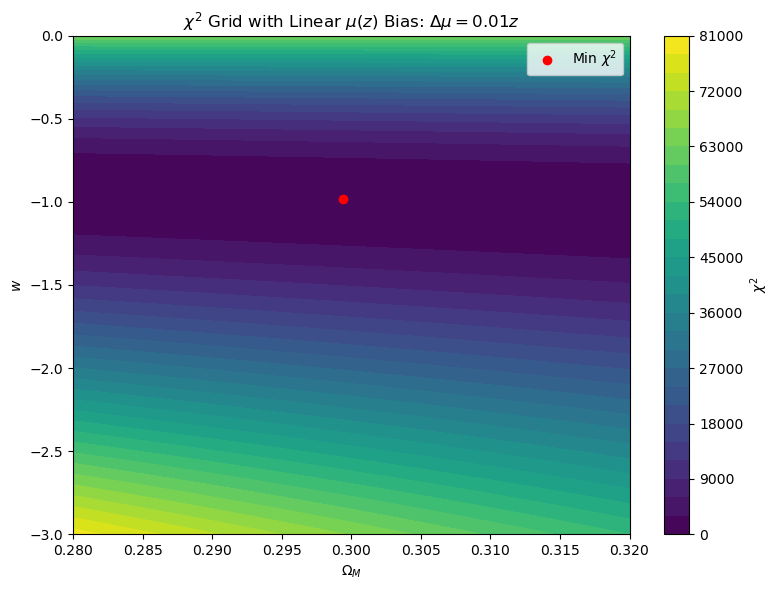

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatwCDM

# Define redshift and true cosmology
z_vals = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
cosmo_true = FlatwCDM(H0=70, Om0=0.3, w0=-1.0)
mu_data = cosmo_true.distmod(z_vals).value

# Parameters
w_grid = np.linspace(-3, 0, 200)
Om_grid = np.linspace(0.28, 0.32, 100)
sigma_mu = 0.005
prior_OmegaM = 0.3
sigma_prior = 0.005

# Apply linear mu bias: Δμ_bias = 0.01 * z
biased_mu = mu_data - 0.01 * z_vals

# Initialize chi2 grid
chi2_grid = np.zeros((len(w_grid), len(Om_grid)))

# Grid search
for i, w in enumerate(w_grid):
    for j, Om in enumerate(Om_grid):
        model = FlatwCDM(H0=70, Om0=Om, w0=w)
        mu_model = model.distmod(z_vals).value
        chi2_data = np.sum((biased_mu - mu_model)**2 / sigma_mu**2)
        chi2_prior = ((Om - prior_OmegaM)**2) / sigma_prior**2
        chi2_grid[i, j] = chi2_data + chi2_prior

# Find best-fit parameters
min_idx = np.unravel_index(np.argmin(chi2_grid), chi2_grid.shape)
best_w = w_grid[min_idx[0]]
best_Om = Om_grid[min_idx[1]]
delta_w = best_w - (-1.0)

# Print results
print(f"Best-fit w = {best_w:.3f}")
print(f"Best-fit Omega_M = {best_Om:.3f}")
print(f"Delta w_bias = {delta_w:.3f}")
print(f"Min chi2 = {np.min(chi2_grid):.3f}")

# === Plot the chi2 grid ===
W, OM = np.meshgrid(Om_grid, w_grid)
plt.figure(figsize=(8, 6))
contour = plt.contourf(W, OM, chi2_grid, levels=30, cmap='viridis')
plt.colorbar(contour, label=r'$\chi^2$')
plt.scatter(best_Om, best_w, color='red', label='Min $\\chi^2$', zorder=5)
plt.xlabel(r'$\Omega_M$')
plt.ylabel(r'$w$')
plt.title(r'$\chi^2$ Grid with Linear $\mu(z)$ Bias: $\Delta \mu = 0.01z$')
plt.legend()
plt.tight_layout()
plt.show()

# Part (e) #

In [18]:
import numpy as np

# Example simulated data
z = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
# Calculate mu based on z using the defined cosmology
cosmo_true = FlatwCDM(H0=70, Om0=0.3, w0=-2.0)
mu = cosmo_true.distmod(z).value
mu = np.array(mu)

# Assign a constant uncertainty for mu
muerr = np.full_like(mu, 0.10)

with open("my_hubble_diagram_p4_pe.txt", "w") as f:
    f.write("VARNAMES: CID zCMB MU MUERR\n")
    for i, (zi, mui, muierr) in enumerate(zip(z, mu, muerr)):
        f.write(f"SN_{i+1:04d} {zi:.3f} {mui:.3f} {muierr:.3f}\n")

# Print the content written to the file
with open("myc21_my_hd.txt", "r") as f:
    print(f.read())

VARNAMES: Z MU SIGMA_MU
0.050 36.735 0.100
0.150 39.266 0.100
0.250 40.502 0.100
0.350 41.344 0.100
0.450 41.988 0.100
0.550 42.510 0.100
0.650 42.950 0.100
0.750 43.330 0.100
0.850 43.665 0.100
0.950 43.963 0.100



Saved to myc21_my_hd.txt
VARNAMES: CID zHD MU MUERR
SN_0001 0.050 36.735 0.100
SN_0002 0.150 39.266 0.100
SN_0003 0.250 40.502 0.100
SN_0004 0.350 41.344 0.100
SN_0005 0.450 41.988 0.100
SN_0006 0.550 42.510 0.100
SN_0007 0.650 42.950 0.100
SN_0008 0.750 43.330 0.100
SN_0009 0.850 43.665 0.100
SN_0010 0.950 43.963 0.100



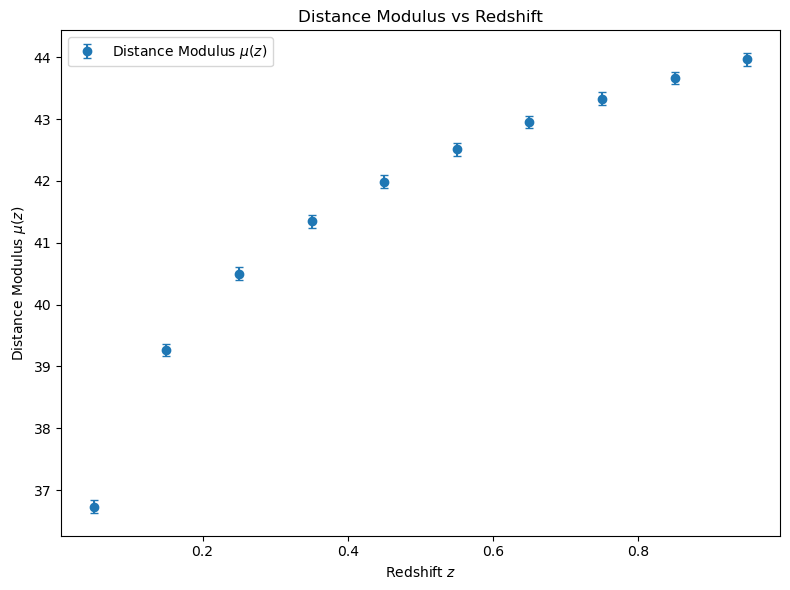

In [21]:
import numpy as np
from astropy.cosmology import FlatwCDM
import matplotlib.pyplot as plt

# Redshifts
z_vals = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

# Distance modulus using FlatwCDM cosmology
cosmo = FlatwCDM(H0=70, Om0=0.3, w0=-1.0)
mu_vals = cosmo.distmod(z_vals).value

# Constant uncertainty
sigma_mu = 0.1 * np.ones_like(mu_vals)

# Write to SNANA-compliant file with row keys
with open("myc21_my_hd.txt", "w") as f:
    f.write("VARNAMES: CID zHD MU MUERR\n")
    for i, (z, mu, sig) in enumerate(zip(z_vals, mu_vals, sigma_mu)):
        cid = f"SN_{i+1:04d}"  # SN_0001, SN_0002, ...
        f.write(f"{cid} {z:.3f} {mu:.3f} {sig:.3f}\n")

print("Saved to myc21_my_hd.txt")

# Print file content
with open("myc21_my_hd.txt", "r") as f:
    print(f.read())

# Plot the distance modulus values for verification
plt.figure(figsize=(8, 6))
plt.errorbar(z_vals, mu_vals, yerr=sigma_mu, fmt='o', label='Distance Modulus $\mu(z)$', capsize=3)
plt.xlabel('Redshift $z$')
plt.ylabel('Distance Modulus $\mu(z)$')
plt.title('Distance Modulus vs Redshift')
plt.legend()
plt.tight_layout()
plt.show()

Saved to myc21_my_hd_w_2.txt
VARNAMES: CID zHD MU MUERR
SN_0001 0.050 36.788 0.100
SN_0002 0.150 39.406 0.100
SN_0003 0.250 40.705 0.100
SN_0004 0.350 41.588 0.100
SN_0005 0.450 42.259 0.100
SN_0006 0.550 42.797 0.100
SN_0007 0.650 43.245 0.100
SN_0008 0.750 43.628 0.100
SN_0009 0.850 43.962 0.100
SN_0010 0.950 44.258 0.100



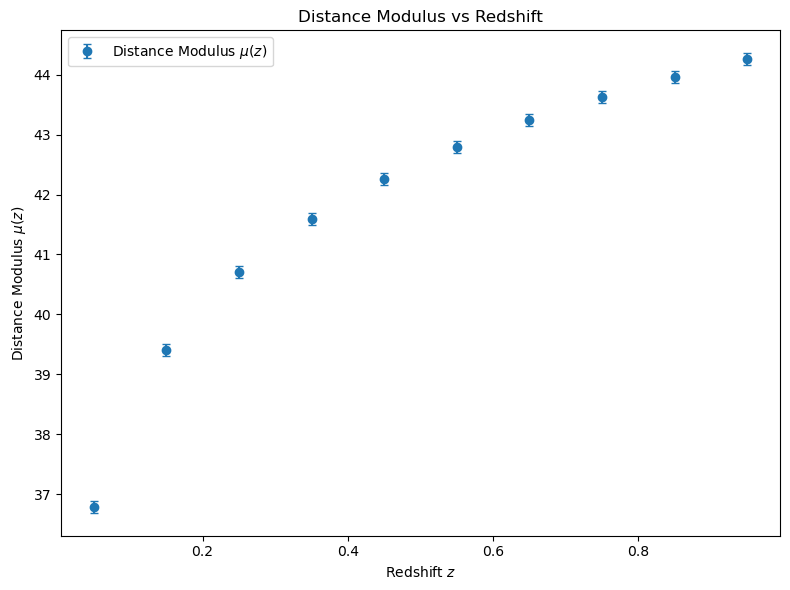

In [22]:
import numpy as np
from astropy.cosmology import FlatwCDM
import matplotlib.pyplot as plt

# Redshifts
z_vals = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

# Distance modulus using FlatwCDM cosmology
cosmo = FlatwCDM(H0=70, Om0=0.3, w0=-2.0)
mu_vals = cosmo.distmod(z_vals).value

# Constant uncertainty
sigma_mu = 0.1 * np.ones_like(mu_vals)

# Write to SNANA-compliant file with row keys
with open("myc21_my_hd_w_2.txt", "w") as f:
    f.write("VARNAMES: CID zHD MU MUERR\n")
    for i, (z, mu, sig) in enumerate(zip(z_vals, mu_vals, sigma_mu)):
        cid = f"SN_{i+1:04d}"  # SN_0001, SN_0002, ...
        f.write(f"{cid} {z:.3f} {mu:.3f} {sig:.3f}\n")

print("Saved to myc21_my_hd_w_2.txt")

# Print file content
with open("myc21_my_hd_w_2.txt", "r") as f:
    print(f.read())

# Plot the distance modulus values for verification
plt.figure(figsize=(8, 6))
plt.errorbar(z_vals, mu_vals, yerr=sigma_mu, fmt='o', label='Distance Modulus $\mu(z)$', capsize=3)
plt.xlabel('Redshift $z$')
plt.ylabel('Distance Modulus $\mu(z)$')
plt.title('Distance Modulus vs Redshift')
plt.legend()
plt.tight_layout()
plt.show()

# Part (f) #

Best-fit w = -0.999
Best-fit Omega_M = 0.301
Δw_bias = 0.001
Min chi2 = 0.925


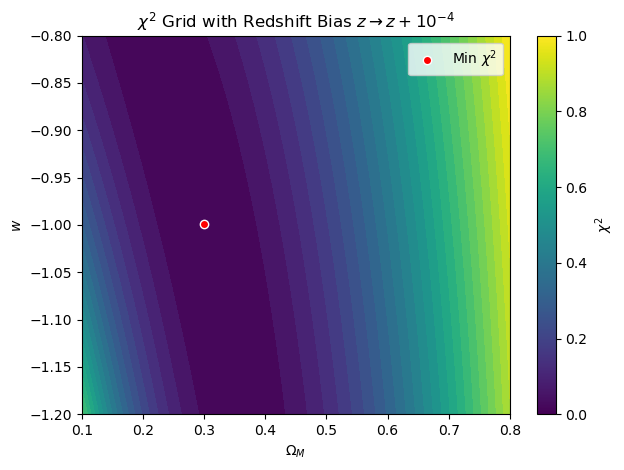

In [46]:
import numpy as np
from astropy.cosmology import FlatwCDM
import matplotlib.pyplot as plt

# Redshift bins and parameters
z_true = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
z_bias = z_true + 1e-4  # Apply small redshift bias

# True cosmology
H0 = 70
Om0 = 0.3
w_true = -1.0
cosmo_true = FlatwCDM(H0=H0, Om0=Om0, w0=w_true)

# Generate unbiased μ values at true redshifts
mu_data = cosmo_true.distmod(z_true).value

# Define grid search space
w_grid = np.linspace(-1.2, -0.8, 300)
Om_grid = np.linspace(0.1, 0.8, 200)
sigma_mu = 0.005
prior_Om0 = 0.3
sigma_prior = 0.005

# Perform grid search over (w, Ω_M)
chi2_grid = np.zeros((len(w_grid), len(Om_grid)))

for i, w in enumerate(w_grid):
    for j, Om in enumerate(Om_grid):
        cosmo = FlatwCDM(H0=H0, Om0=Om, w0=w)
        mu_model = cosmo.distmod(z_bias).value  # Use biased redshift here
        chi2_data = np.sum(((mu_data - mu_model) / sigma_mu) ** 2)
        chi2_prior = ((Om - prior_Om0) ** 2) / (sigma_prior ** 2)
        chi2_grid[i, j] = chi2_data + chi2_prior

# Find best-fit w and Omega_M
min_idx = np.unravel_index(np.argmin(chi2_grid), chi2_grid.shape)
w_fit = w_grid[min_idx[0]]
Om_fit = Om_grid[min_idx[1]]
chi2_min = np.min(chi2_grid)

# Compute Δw_bias
delta_w_bias = w_fit - w_true

# Report results
print(f"Best-fit w = {w_fit:.3f}")
print(f"Best-fit Omega_M = {Om_fit:.3f}")
print(f"Δw_bias = {delta_w_bias:.3f}")
print(f"Min chi2 = {chi2_min:.3f}")

# Optional: plot chi^2 surface
W, OM = np.meshgrid(Om_grid, w_grid)
plt.contourf(W, OM, chi2_grid, levels=30, cmap='viridis')
plt.scatter(Om_fit, w_fit, color='red', edgecolor='white', label='Min $\\chi^2$')
plt.xlabel(r'$\Omega_M$')
plt.ylabel(r'$w$')
plt.title(r'$\chi^2$ Grid with Redshift Bias $z \rightarrow z + 10^{-4}$')
plt.colorbar(label=r'$\chi^2$')
plt.legend()
plt.tight_layout()
plt.show()

Best-fit w       = -1.003
Best-fit Omega_M = 0.301
Δw_bias          = -0.003
Min chi^2        = 0.822


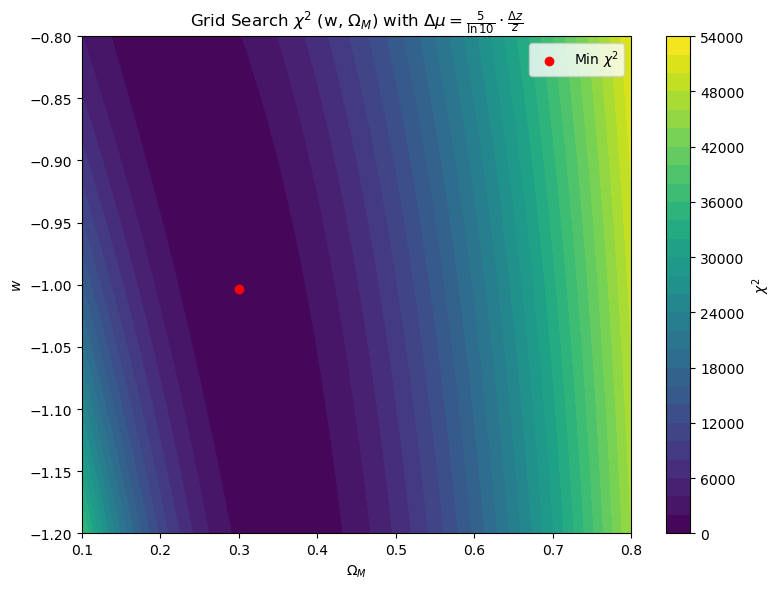

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatwCDM

# Define redshift bins
z_vals = np.array([0.05, 0.15, 0.25, 0.35, 0.45,
                   0.55, 0.65, 0.75, 0.85, 0.95])

# Define true cosmology
H0 = 70
Om0_true = 0.3
w_true = -1.0
cosmo_true = FlatwCDM(H0=H0, Om0=Om0_true, w0=w_true)

# Generate true mu values
mu_true = cosmo_true.distmod(z_vals).value

# Apply mu bias from redshift shift Δz = 1e-4 using first-order approximation
delta_z = 1e-4
delta_mu = (5 / np.log(10)) * (delta_z / z_vals)
mu_biased = mu_true + delta_mu

# Grid setup for w and Omega_M
w_grid = np.linspace(-1.2, -0.8, 300)
Om_grid = np.linspace(0.1, 0.8, 200)
sigma_mu = 0.005
prior_Om0 = 0.3
sigma_prior = 0.005

# Grid search
chi2_grid = np.zeros((len(w_grid), len(Om_grid)))
for i, w in enumerate(w_grid):
    for j, Om in enumerate(Om_grid):
        cosmo = FlatwCDM(H0=H0, Om0=Om, w0=w)
        mu_model = cosmo.distmod(z_vals).value
        chi2_data = np.sum(((mu_biased - mu_model) / sigma_mu) ** 2)
        chi2_prior = ((Om - prior_Om0) / sigma_prior) ** 2
        chi2_grid[i, j] = chi2_data + chi2_prior

# Locate minimum
min_idx = np.unravel_index(np.argmin(chi2_grid), chi2_grid.shape)
w_fit = w_grid[min_idx[0]]
Om_fit = Om_grid[min_idx[1]]
chi2_min = chi2_grid[min_idx]
delta_w_bias = w_fit - w_true

# Report results
print(f"Best-fit w       = {w_fit:.3f}")
print(f"Best-fit Omega_M = {Om_fit:.3f}")
print(f"Δw_bias          = {delta_w_bias:.3f}")
print(f"Min chi^2        = {chi2_min:.3f}")

# Plot chi^2 surface
W, OM = np.meshgrid(Om_grid, w_grid)
plt.figure(figsize=(8, 6))
contour = plt.contourf(W, OM, chi2_grid, levels=30, cmap="viridis")
plt.colorbar(contour, label=r"$\chi^2$")
plt.scatter(Om_fit, w_fit, color="red", label="Min $\chi^2$")
plt.xlabel(r"$\Omega_M$")
plt.ylabel(r"$w$")
plt.title(r"Grid Search $\chi^2$ (w, $\Omega_M$) with $\Delta \mu = \frac{5}{\ln 10} \cdot \frac{\Delta z}{z}$")
plt.legend()
plt.tight_layout()
plt.show()